In [1]:
from google.colab import files
uploaded = files.upload()

Saving district_of_seoul.csv to district_of_seoul.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving fixed_cctv_for_parking_enforcement.csv to fixed_cctv_for_parking_enforcement.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving seoul-map.json to seoul-map.json


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import json
import matplotlib.pyplot as plt
import folium

In [5]:
df = pd.read_csv("fixed_cctv_for_parking_enforcement.csv")
f = open("seoul-map.json",encoding="utf8")
dis = pd.read_csv("district_of_seoul.csv")

In [6]:
df.head()

,id,latitude,longitude,district,district_KOR,address_KOR,name_KOR
0,1,37.535891,126.870566,Yangcheon-gu,양천구,서울 양천구 목4동 762-10,목4동 영도초등학교 앞
1,2,37.532740,126.867191,Yangcheon-gu,양천구,서울 양천구 목4동 797-8,목4동 태학관 앞
2,3,37.526782,126.843910,Yangcheon-gu,양천구,서울 양천구 신월2동 452-2,신월2동 영림프라임샤시 앞
3,4,37.522349,126.833529,Yangcheon-gu,양천구,서울 양천구 신월7동 928-1,신월7동 우성상가 앞
4,5,37.528982,126.874597,Yangcheon-gu,양천구,서울 양천구 목1동 917,목1동 파라곤(SBS) 앞


**Plotting all districts from json**

In [8]:
data = json.load(f)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


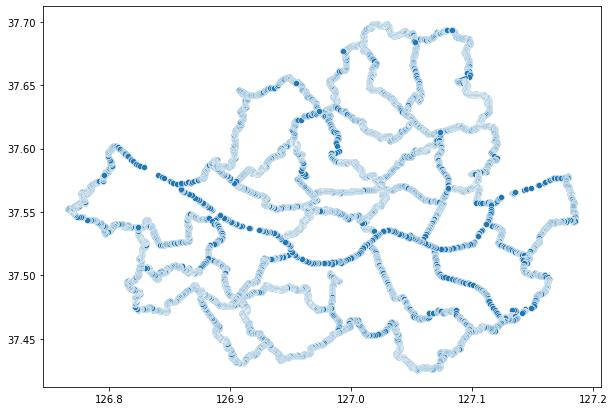

In [9]:
m=[]
n=[]
for i in range(len(data['features'])):
    for j in range(len(data['features'][i]['geometry']['coordinates'][0])):
        m.append(data['features'][i]['geometry']['coordinates'][0][j][0])
        n.append(data['features'][i]['geometry']['coordinates'][0][j][1])
plt.figure(figsize=(10,7))
sns.scatterplot(m,n)

In [10]:
dis

,district_id,name,population,area,latitude,longitude,name_KOR
0,1,Dobong-gu,323280,20.65,37.665861,127.031767,도봉구
1,2,Eunpyeong-gu,478922,29.71,37.617612,126.922700,은평구
2,3,Dongdaemun-gu,352591,14.22,37.583801,127.050700,동대문구
3,4,Dongjak-gu,398310,16.35,37.496504,126.944307,동작구
4,5,Geumcheon-gu,244273,13.02,37.460097,126.900155,금천구
5,6,Guro-gu,425854,20.12,37.495486,126.858121,구로구
6,7,Jongno-gu,156325,23.91,37.599100,126.986149,종로구
7,8,Gangbuk-gu,307080,23.60,37.646995,127.014716,강북구
8,9,Jungnang-gu,396278,18.50,37.595379,127.093967,중랑구
9,10,Gangnam-gu,538352,39.50,37.495985,127.066409,강남구


***Plotting with proper format***

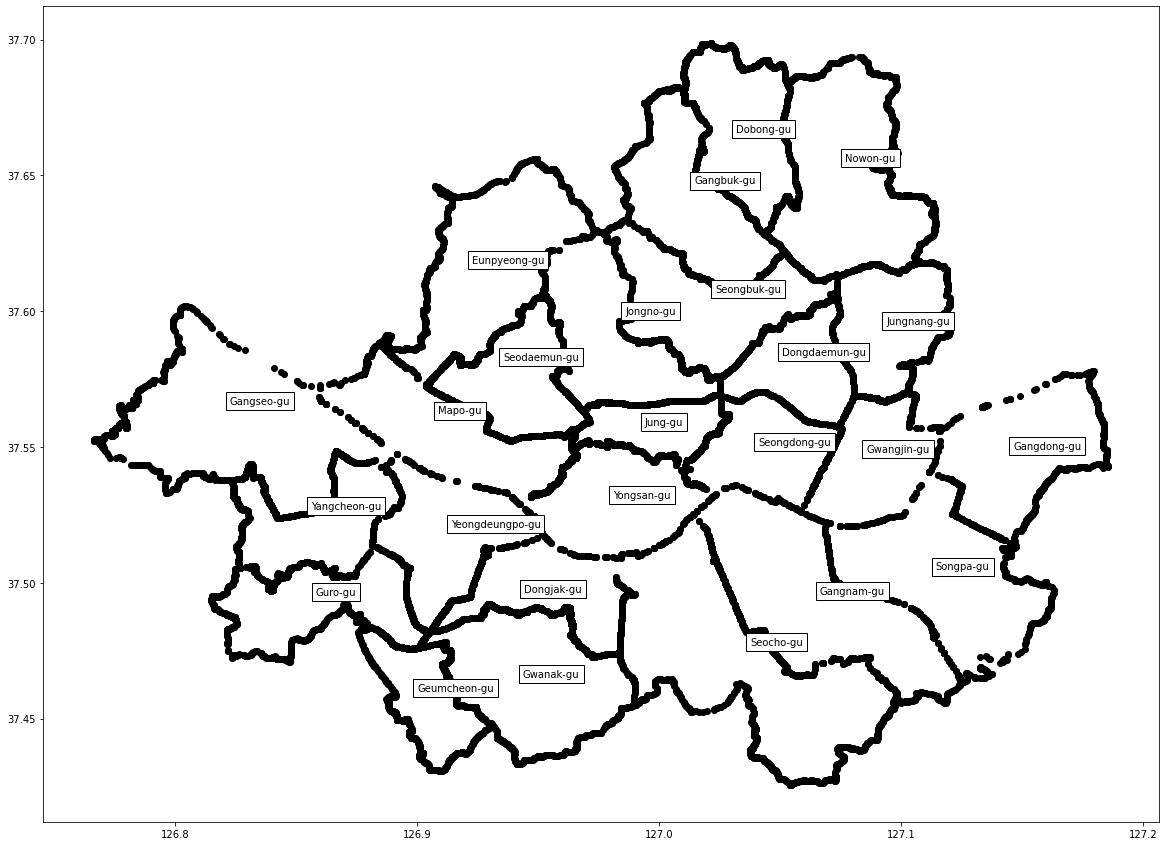

In [11]:
plt.figure(figsize=(20,15))
#plt.scatter(dis['longitude'],dis['latitude'])
for i in range(dis.shape[0]):
    plt.text(x=dis.longitude[i],y=dis.latitude[i],s=dis.name[i],fontdict=dict(color='black'),bbox=dict(facecolor='white'))
plt.scatter(m,n,c='black')

In [12]:
#plotting camera,s in districts
df_Songpa_gu = df[df['district'] == 'Songpa-gu']
df_Songpa_gu

,id,latitude,longitude,district,district_KOR,address_KOR,name_KOR
266,268,37.493883,127.117187,Songpa-gu,송파구,가락1동 600,소방공제회관 건너편 가락시장 부근
267,269,37.499827,127.126770,Songpa-gu,송파구,가락동 156-6,송파구 씨알빌딩 앞
268,270,37.493988,127.121819,Songpa-gu,송파구,가락동 79-3,송파구 대동빌딩 앞
269,271,37.494451,127.117271,Songpa-gu,송파구,가락본동 96-15,비석거리공원 부근
339,341,37.515925,127.109029,Songpa-gu,송파구,방이2동 35-2,방이동 쌩모리빌오피스텔부근
...,...,...,...,...,...,...,...
2461,2521,37.524694,127.107128,Songpa-gu,송파구,송파구 풍납동 387,아산병원 별관앞 주변
2462,2522,37.499698,127.105438,Songpa-gu,송파구,송파구 석촌동 274,헬리오시티근린공원 주변
2463,2523,37.500966,127.109753,Songpa-gu,송파구,송파구 석촌동 297-28,송파동부센트레빌A 주변
2464,2524,37.500095,127.111197,Songpa-gu,송파구,송파구 가락동 479,헬리오시티상가 주변


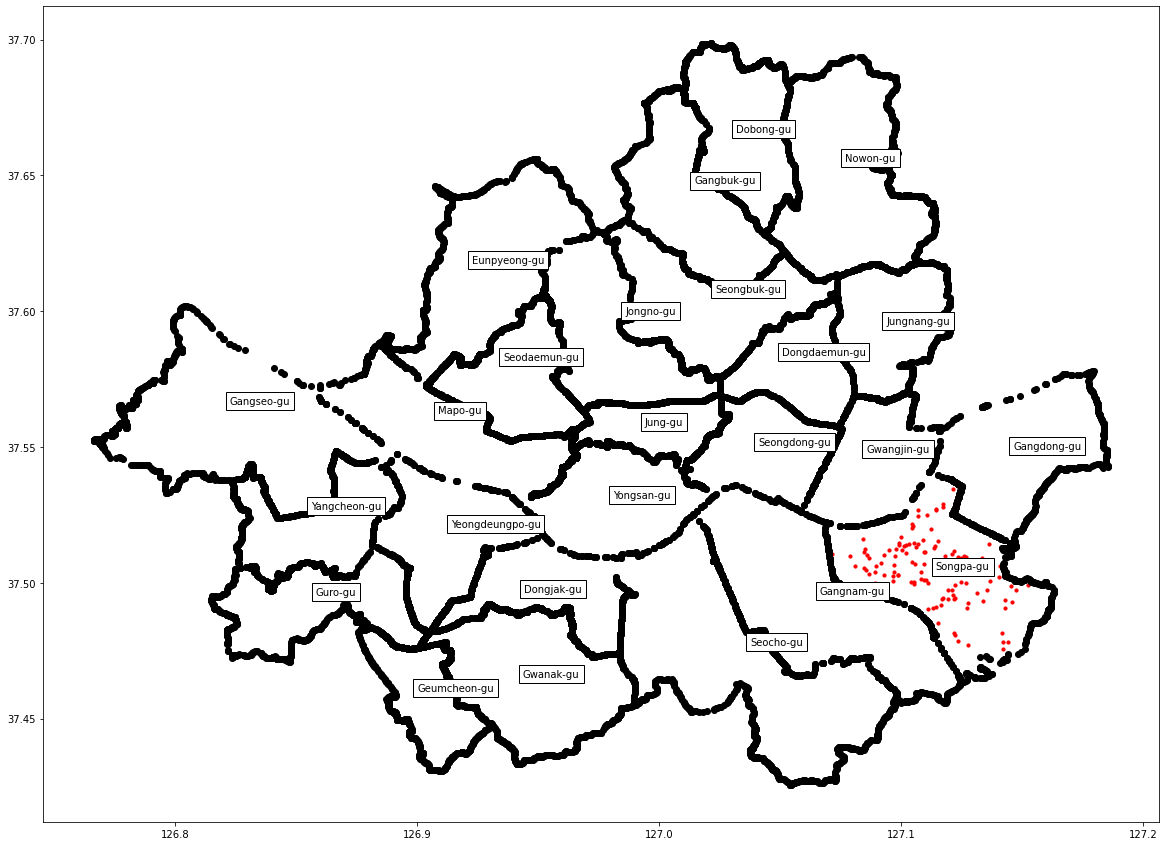

In [13]:
plt.figure(figsize=(20,15))
#plt.scatter(dis['longitude'],dis['latitude'])
for i in range(dis.shape[0]):
    plt.text(x=dis.longitude[i],y=dis.latitude[i],s=dis.name[i],fontdict=dict(color='black'),bbox=dict(facecolor='white'))
plt.scatter(df_Songpa_gu['longitude'],df_Songpa_gu['latitude'],c='red',s=10)
plt.scatter(m,n,c='black')

In [14]:
#Plotting in folium maps
map = folium.Map(location=[37.541, 126.986], zoom_start=12)
for i in range(0, len(df_Songpa_gu)):
    folium.Marker(location = [df_Songpa_gu.iloc[i]['latitude'],df_Songpa_gu.iloc[i]['longitude']],
    icon=folium.Icon(color="red")
  ).add_to(map)
map